# Problem Approach
 - Data Acquisition
 - Data Cleaning
     * Checking for null values
     * Removing unwanted column
     
     * Droping Duplicate rows
     * Removing outliers
 - Exploratory data analysis(EDA)
 - Model Building
 - Hyperparameter tuning of model-need to be done!!!
 - Validation of Model
 - Saving the model
 - Testing the data with real time Examples
 
## Required Libraries:

-  Numpy
- Pandas
- SciKit-Learn
- Seaborn
- Matplotlib
- pickle



### Data Acquisition

In [1]:
#importing the nessescary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("train_datasets_14872_228180_Admission_Predict_Ver1.1.csv")

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [5]:
df.info()  # no categorical features 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


# Data Cleaning

##### Checking for null values

Text(0.5, 1.0, 'Missing Data')

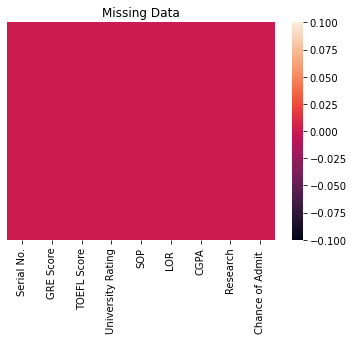

In [6]:
sns.heatmap(df.isnull(),yticklabels = False)
plt.title('Missing Data')

### With above visualisation  we can clearly see that our data has no null values 

In [7]:
# imputing the fields according to the need

In [8]:
def impute_TANCET(cols):
    cgpa=cols[0]
    return(int(8.8*cgpa))
def impute_GATE(cols):
    GATE=cols[0]
    return(int((GATE-2.56)*10))

In [9]:
df['Tancet'] = df[["CGPA"]].apply(impute_TANCET,axis=1)
df['GATE']   = df[["CGPA"]].apply(impute_GATE,axis=1)

#### Droping Duplicate rows



In [10]:
df.drop_duplicates(inplace=True)

df.shape

(500, 11)

#### Removing unwanted column

In [11]:
# as Serial No. has no co-relation we can drop that
del df["Serial No."]

##### Co-relation map for analysis

<AxesSubplot:>

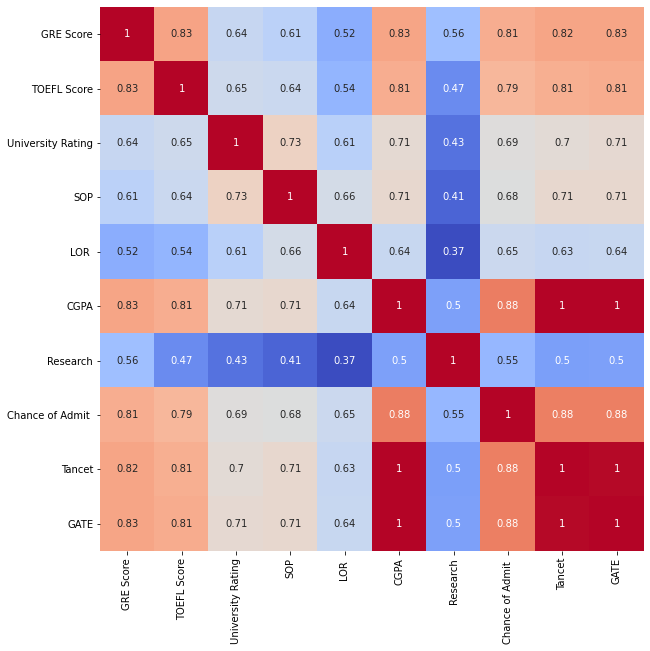

In [12]:
f,ax=plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(method="pearson"),annot=True,fmt ='.2g',square=True,cmap='coolwarm',cbar=False,ax=ax)

# Exploratory data analysis(EDA)
### Plotting histogram and boxplot to find the dispersion of data

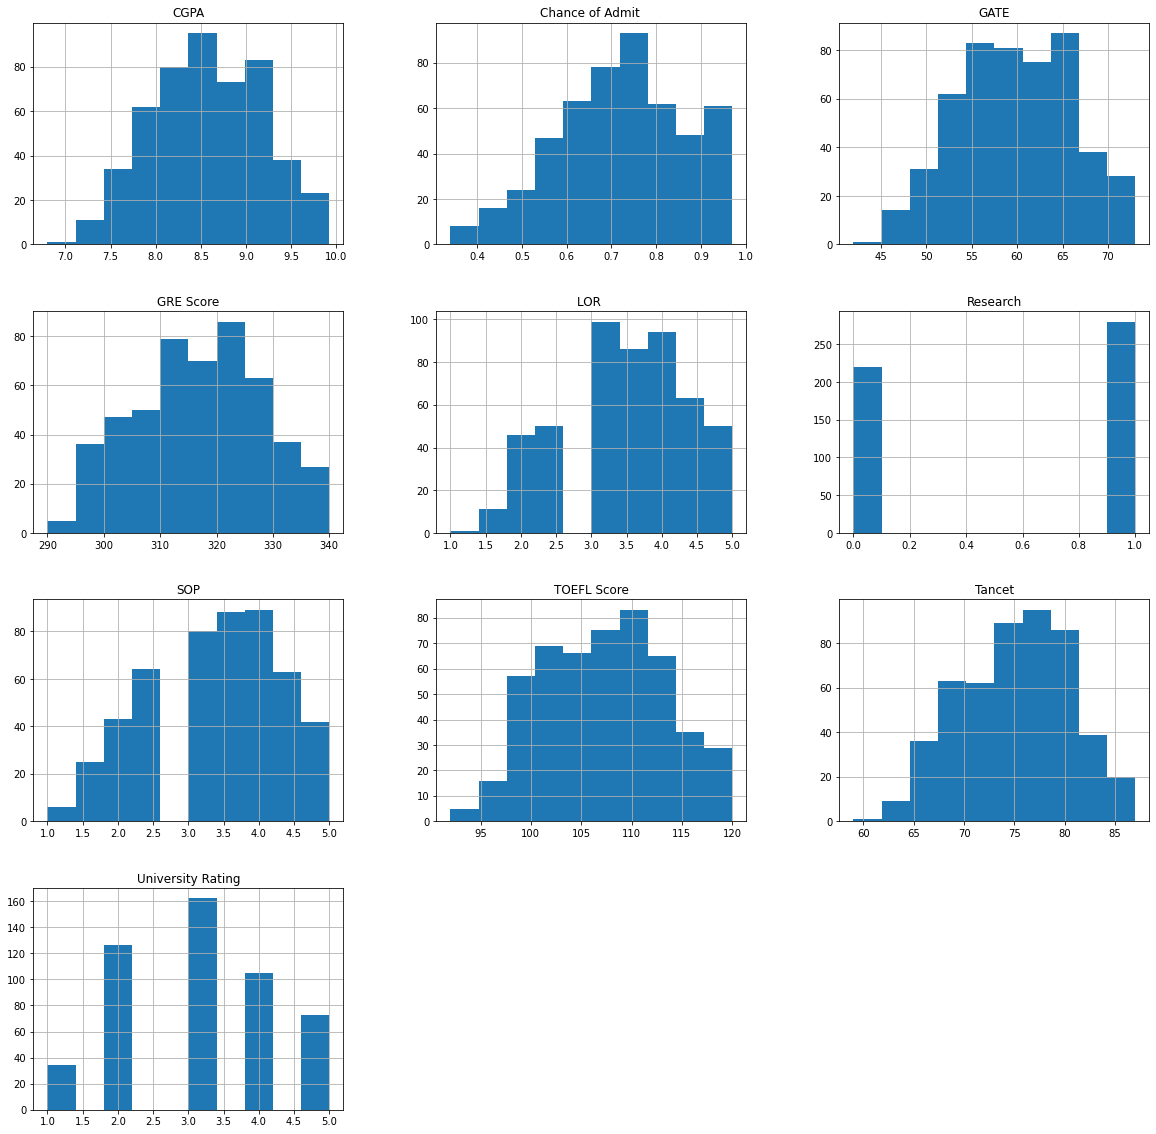

In [13]:
df.hist(figsize = (20, 20))
plt.show()

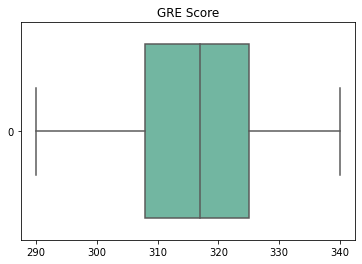

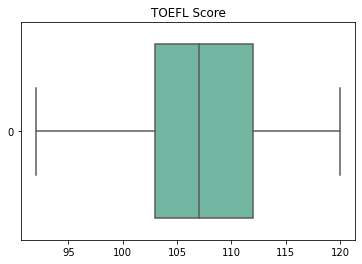

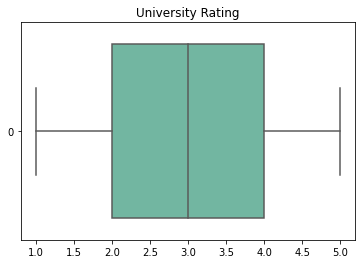

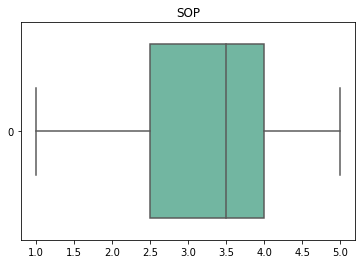

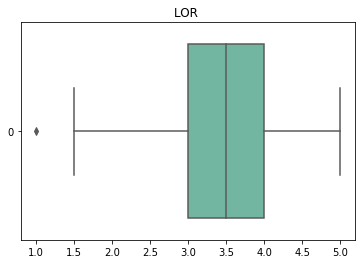

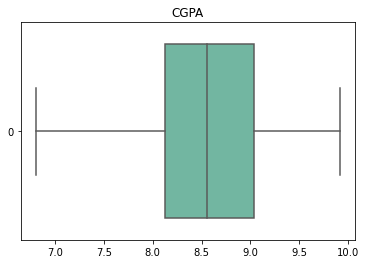

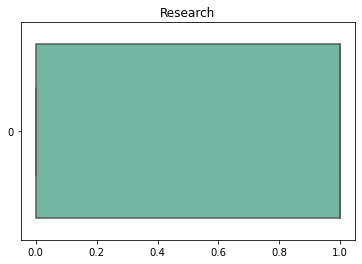

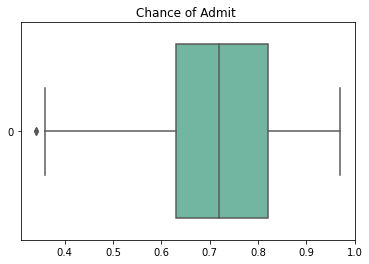

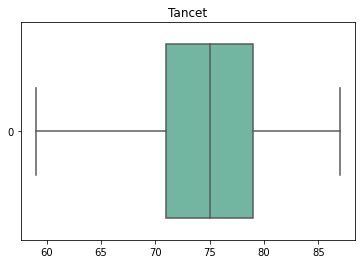

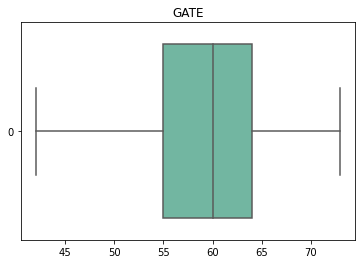

In [14]:
for i in df.columns:
    plt.figure()
    ax = sns.boxplot(data=df[i], orient="h", palette="Set2")
    plt.title(i)

### Insights From Our Data
- From above histogram and boxplot we can clearly see that there very minimum  of outliers in our data
- CGPA and GRE plays a vital role in determining the admission 

In [15]:
# making coloumn name in PEP-8 format

In [16]:
d={'GRE Score':'GRE_Score','TOEFL Score':'TOEFL_Score', 'University Rating':'University_Rating','SOP':'SOP','LOR ':'LOR','CGPA':'CGPA',
       'Research':'Research', 'Chance of Admit ':'Chance_of_Admit', 'Tancet':'Tancet', 'GATE':'GATE'}
df.rename(columns = d, inplace = True)

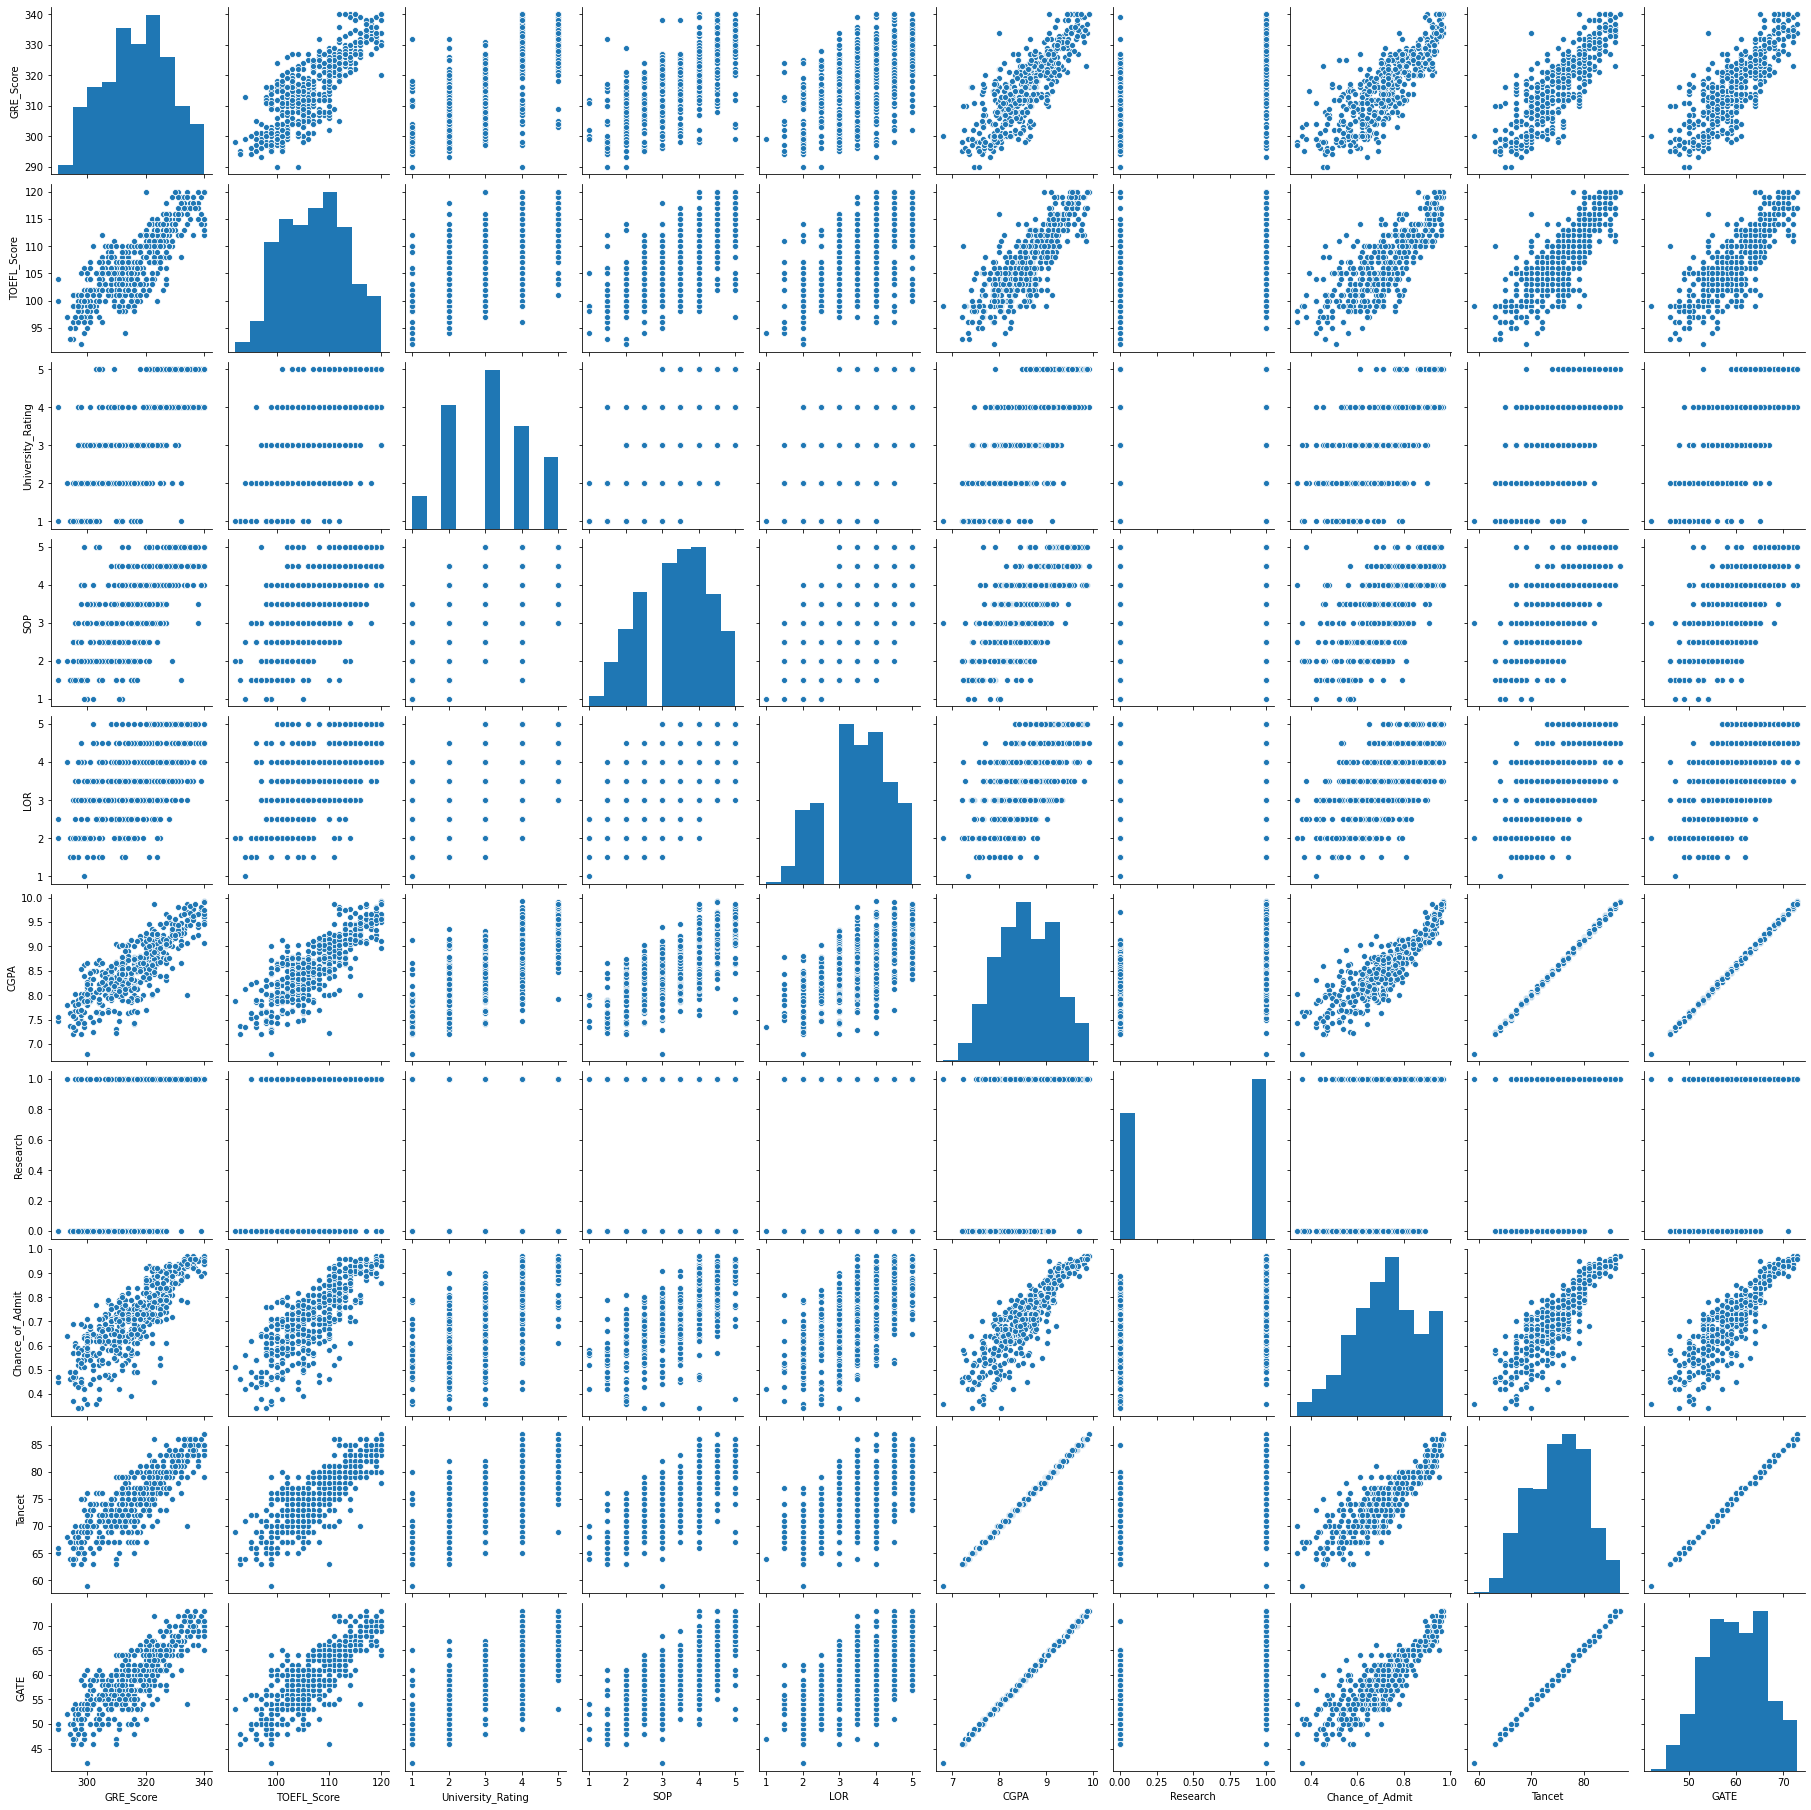

In [17]:
sns.pairplot(df)

## Model Building
   * split of dependent and independent features
   * train test split

In [18]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit', 'Tancet', 'GATE'],
      dtype='object')

In [19]:
# spliting of dependent and independent features
X = df.drop("Chance_of_Admit",axis=1)
y  = df["Chance_of_Admit"]

In [20]:
X     #independent feature

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Tancet,GATE
0,337,118,4,4.5,4.5,9.65,1,84,70
1,324,107,4,4.0,4.5,8.87,1,78,63
2,316,104,3,3.0,3.5,8.00,1,70,54
3,322,110,3,3.5,2.5,8.67,1,76,61
4,314,103,2,2.0,3.0,8.21,0,72,56
...,...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,79,64
496,337,117,5,5.0,5.0,9.87,1,86,73
497,330,120,5,4.5,5.0,9.56,1,84,70
498,312,103,4,4.0,5.0,8.43,0,74,58


In [21]:
y #dependent feature

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance_of_Admit, Length: 500, dtype: float64

In [22]:
#train test split split ratio (test:train)=70:30
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

## Comaparitive Analysis Of the Models

### Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [24]:
regressor.fit(X_train,y_train)

LinearRegression()

In [25]:
y_predict=regressor.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test,y_predict) 

0.004274138176893162

In [27]:
from sklearn import metrics
print("Model Report Using Linear Regression")
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
from sklearn.metrics import r2_score
print('r2_score:',r2_score(y_test, y_predict))

Model Report Using Linear Regression
MAE: 0.044969891864182945
MSE: 0.004274138176893162
RMSE: 0.06537689329490322
r2_score: 0.8091495527714817


### DecisionTreeRegressor

In [28]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(criterion="mse")
reg_dtree=dtree.fit(X_train,y_train)
y_pred_dtree = reg_dtree.predict(X_test)
print("Model Report Using Decision TreeRegressor")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_dtree))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_dtree))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dtree)))
from sklearn.metrics import r2_score
print('r2_score:',r2_score(y_test, y_pred_dtree))

Model Report Using Decision TreeRegressor
MAE: 0.07273333333333332
MSE: 0.010117999999999999
RMSE: 0.10058826969383657
r2_score: 0.5482072068943277


### RandomForestRegressor

In [29]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfregressor.fit(X_train,y_train)
y_pred_randomforest = rfregressor.predict(X_test)
#MODEL EVALUATION

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_randomforest))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_randomforest))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_randomforest)))
print('r2_score:',r2_score(y_test, y_pred_randomforest))

MAE: 0.04913999999999999
MSE: 0.005191393333333333
RMSE: 0.07205132429964999
r2_score: 0.7681919258572016


### KNN Regressor

In [30]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=1)
knn_reg.fit(X_train, y_train)
y_pred_knn=knn_reg.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_knn))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_knn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))
print('r2_score:',r2_score(y_test, y_pred_knn))

MAE: 0.06979999999999999
MSE: 0.009718
RMSE: 0.09857991681879225
r2_score: 0.5660681593792327


In [31]:
A = LinearRegression()
B = DecisionTreeRegressor(criterion="mse")
C = RandomForestRegressor(n_estimators = 10, random_state = 0)
D = KNeighborsRegressor(n_neighbors=3)
objects = ('LReg', 'DTree', 'RForest', 'KNN')

In [32]:

# function to train regressor
def train_classifier(reg, X_train, y_train):    
    reg.fit(X_train, y_train)

# function to predict features 
def predict_labels(reg, features):
    return (reg.predict(features))

#### MAE Comparison 

----------------------------------------------------------------------------------------------------
0.044969891864182945
----------------------------------------------------------------------------------------------------
0.07393333333333331
----------------------------------------------------------------------------------------------------
0.04913999999999999
----------------------------------------------------------------------------------------------------
0.052044444444444435


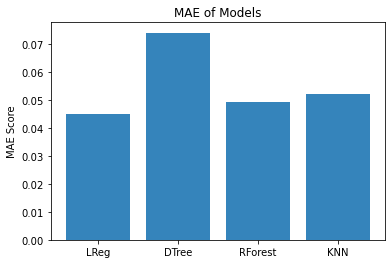

In [33]:

reg = [A,B,C,D]
pred_val = [0,0,0,0]

for a in range(0,4):
    train_classifier(reg[a], X_train, y_train)
    y_pred = predict_labels(reg[a],X_test)
    pred_val[a] =metrics.mean_absolute_error(y_test, y_pred) 
    print("--"*50)
    print(pred_val[a])
y_pos = np.arange(len(objects))
y_val = [ x for x in pred_val]
plt.bar(y_pos,y_val, align='center', alpha=0.9)
plt.xticks(y_pos, objects)
plt.ylabel('MAE Score')
plt.title('MAE of Models')
plt.show()


#### MSE Comparison

----------------------------------------------------------------------------------------------------
0.004274138176893162
----------------------------------------------------------------------------------------------------
0.00894933333333333
----------------------------------------------------------------------------------------------------
0.005191393333333333
----------------------------------------------------------------------------------------------------
0.005695555555555554


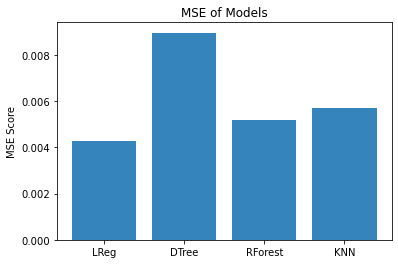

In [34]:
reg = [A,B,C,D]
pred_val = [0,0,0,0]

for a in range(0,4):
    train_classifier(reg[a], X_train, y_train)
    y_pred = predict_labels(reg[a],X_test)
    pred_val[a] =metrics.mean_squared_error(y_test, y_pred) 
    print("--"*50)
    print(pred_val[a])
y_pos = np.arange(len(objects))
y_val = [ x for x in pred_val]
plt.bar(y_pos,y_val, align='center', alpha=0.9)
plt.xticks(y_pos, objects)
plt.ylabel('MSE Score')
plt.title('MSE of Models')
plt.show()

#### RMSE Comparison

----------------------------------------------------------------------------------------------------
0.06537689329490322
----------------------------------------------------------------------------------------------------
0.10276510432372783
----------------------------------------------------------------------------------------------------
0.07205132429964999
----------------------------------------------------------------------------------------------------
0.07546890456045824


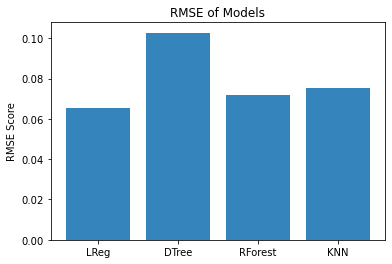

In [35]:
reg = [A,B,C,D]
pred_val = [0,0,0,0]

for a in range(0,4):
    train_classifier(reg[a], X_train, y_train)
    y_pred = predict_labels(reg[a],X_test)
    pred_val[a] =np.sqrt(metrics.mean_squared_error(y_test, y_pred)) 
    print("--"*50)
    print(pred_val[a])
y_pos = np.arange(len(objects))
y_val = [ x for x in pred_val]
plt.bar(y_pos,y_val, align='center', alpha=0.9)
plt.xticks(y_pos, objects)
plt.ylabel('RMSE Score')
plt.title('RMSE of Models')
plt.show()

# r2_score Comparison

----------------------------------------------------------------------------------------------------
0.8091495527714817
----------------------------------------------------------------------------------------------------
0.6142927310884763
----------------------------------------------------------------------------------------------------
0.7681919258572016
----------------------------------------------------------------------------------------------------
0.7456798821177136


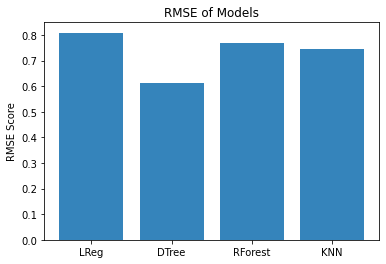

In [36]:
from sklearn.metrics import r2_score

reg = [A,B,C,D]
pred_val = [0,0,0,0]

for a in range(0,4):
    train_classifier(reg[a], X_train, y_train)
    y_pred = predict_labels(reg[a],X_test)
    pred_val[a] =r2_score(y_test, y_pred)
    print("--"*50)
    print(pred_val[a])
y_pos = np.arange(len(objects))
y_val = [ x for x in pred_val]
plt.bar(y_pos,y_val, align='center', alpha=0.9)
plt.xticks(y_pos, objects)
plt.ylabel('RMSE Score')
plt.title('RMSE of Models')
plt.show()

### As all performance matrics is good in DecisionTree Regressor choosing that for final model building

#### conversion of Pickle file is for reducing the trainning time and model deployement 

In [37]:
import pickle
model=open("Admission_predict.pkl","wb")
pickle.dump(dtree,model)
model.close()